# Netflix Movies and TV Shows Exploratory Data Analysis

This dataset contains infomation about movies and TV shows of one of the biggest streaming service - Netflix. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importing file 
netflix = pd.read_csv("Downloads/archive/netflix.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


This dataset has 8807 rows and 12 columns including:
* show_id: unique id of each movies/tv shows
* type: the category, Movie or TV show
* title: the name of the film
* director: the name of the director of the film
* cast: actors in the film
* country: the country where the film is produced
* date_added: the date the film was added on Netflix
* release_year: the year the film was released
* rating: the TV rating of the film
* duration: the duration of the film, in minutes or in seasons
* listed_in: the genres of the film
* description: the description of the film

### Data Cleaning

In [5]:
#number of unique values in each columns
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
#number of null values
netflix.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The missing values are:
* director: the are too many missing values and the infomation is not needed for this analysis
* cast: there are not so much to tell about this infomation
* country: This is an important value so it must be fixed
* date_added, rating and duration: There are just a few missing values so it can be fixed


In [7]:
netflix[netflix['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [20]:
#add date added found on google for each films with NaN date added value
date_added_na = {
    6066:"September 15, 2014",
    6174:"June 1, 2020",
    6795:"April 6, 2016",
    6806:"January 1, 2015",
    6901:"January 4, 2016",
    7196:"July 6, 2017",
    7254:"June 1, 2015",
    7406:"January 13, 2017",
    7847:"September 15, 2014",
    8182:"September 15, 2014"
}
for id, date in date_added_na.items():
    netflix.iloc[id, 6] = date

In [21]:
#check null values again
netflix['date_added'].isna().sum()

0

In [22]:
#repeat the same process with rating
netflix[netflix['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience


In [23]:
netflix['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [24]:
rating_na = {
    5989:"TV-PG",
    6827:"TV-14",
    7312:"TV-MA",
    7537:"PG-13"
}

for id, rate in rating_na.items():
    netflix.iloc[id, 8] = rate

netflix['rating'].isna().sum()

0

In [25]:
netflix = netflix[netflix['rating'] != ('74 min', '84 min', '66 min')]

In [26]:
netflix[netflix['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,audience


In [27]:
#The duration is difficult to find so I remove it
netflix = netflix[netflix['duration'].notna()]

In [28]:
# fixing country values with mode
netflix['country'].fillna(netflix['country'].mode()[0], inplace=True)
netflix['country'].isna().sum()

0

In [29]:
#drop column director and cast
netflix = netflix.drop(['director','cast'], axis = 1)

There are many rows has multiple values of country, so I will take only one country appears first to analysis

In [30]:
netflix['main_country'] = netflix['country'].apply(lambda x: x.split(","),[0])
netflix['main_country'] = netflix['main_country'].str[0]

In [31]:
#check again for null values
netflix.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
audience        0
main_country    0
dtype: int64

In [32]:
# Creating two new column year and month from date added
netflix['year'] = netflix['date_added'].apply(lambda x: x.split(" ")[-1])
netflix['month'] = netflix['date_added'].apply(lambda x: x.split(" ")[0])

Specify the target audience based on rating

In [33]:
audience = {
    'PG-13':'Teens',
    'TV-MA':'Adults',
    'PG':'Older Kids',
    'TV-14':'Teens',
    'TV-PG':'Older Kids',
    'TV-Y':'Kids',
    'TV-Y7':'Older Kids',
    'R':'Adults',
    'TV-G':'Kids',
    'G':'Kids',
    'NC-17':'Adults',
    'NR':'Adults',
    'TV-Y7-FV':'Older Kids',
    'UR':'Adults'}
netflix['audience'] = netflix['rating'].replace(audience)

In [36]:
netflix.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,audience,main_country,year,month
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,United States,2021,September
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,South Africa,2021,September
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,United States,2021,September
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,United States,2021,September
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,India,2021,September


In [289]:
#change type to categorical
netflix['type'] = pd.Categorical(netflix['type'])
#change year to integer
netflix['year'] = pd.to_numeric(netflix['year'])

In [290]:
netflix_tv = netflix[netflix['type'] == 'TV Show']
netflix_movie = netflix[netflix['type'] == 'Movie']

In [288]:
netflix['genre'] = netflix['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

### Visualization

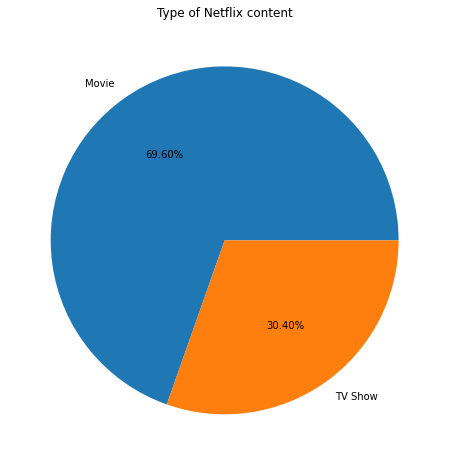

In [35]:
plt.figure(figsize = (8,8))
plt.pie(netflix['type'].value_counts(), labels = ['Movie','TV Show'], autopct='%.2f%%')
plt.title('Type of Netflix content');

* The result shows that 69.6% of Netflix content are Movie, accounting for more than 2/3 of total. 

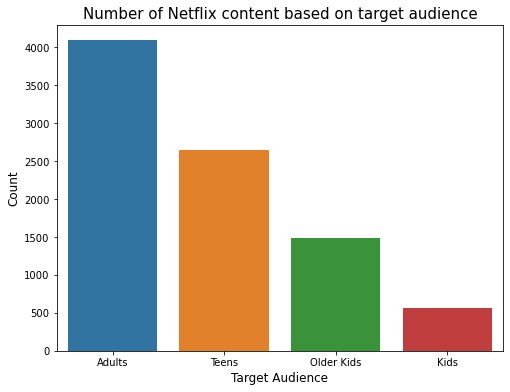

In [64]:
plt.figure(figsize = (8,6))
rating_age = netflix.groupby('audience')['show_id'].count().sort_values(ascending=False).reset_index()
sns.barplot(data=rating_age, x='audience', y='show_id')
plt.title('Number of Netflix content based on target audience', fontsize=15)
plt.xlabel('Target Audience', fontsize=12)
plt.ylabel('Count', fontsize=12);

* In can be said that most of Netflix content produced concentrates on adults and teens.

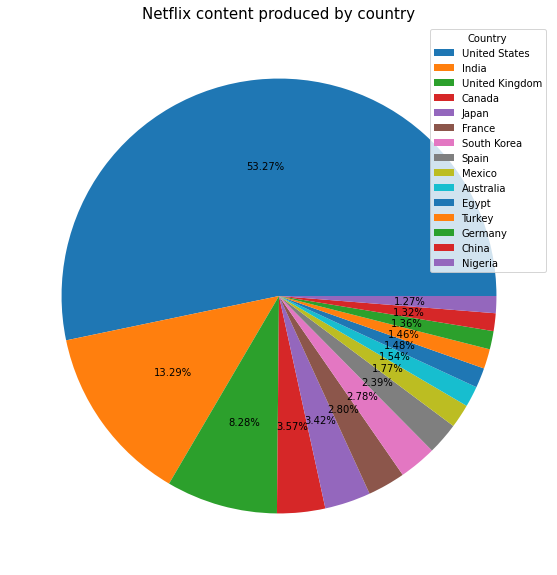

In [115]:
plt.figure(figsize = (10,10))
main_country_count = netflix['main_country'].value_counts().reset_index()
main_country_count = main_country_count[(main_country_count['main_country'] / main_country_count['main_country'].sum()) > 0.01]
main_country_count.head()
plt.pie(main_country_count['main_country'], labels = main_country_count['index'], autopct='%.2f%%', labeldistance = None)
plt.title('Netflix content produced by country', fontsize=15)
plt.legend(title = 'Country');

* United States is the country that produced the most movies on netflix with more than half of the total, followed by India and United Kingdom.

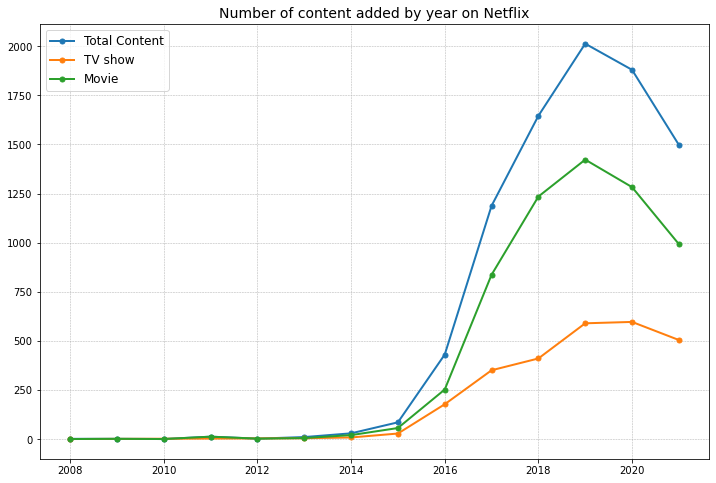

In [162]:
netflix_year = netflix.groupby('year')['show_id'].count().reset_index()
netflix_year_tv = netflix_tv.groupby('year')['show_id'].count().reset_index()
netflix_year_movie = netflix_movie.groupby('year')['show_id'].count().reset_index()

netflix_year_tv.head()

plt.figure(figsize=(12,8))
plt.plot(netflix_year['year'], netflix_year['show_id'], label = 'Total Content', linewidth = 2, marker = 'o', markersize = 5)
plt.plot(netflix_year_tv['year'], netflix_year_tv['show_id'], label = 'TV show', linewidth = 2, marker = 'o', markersize = 5)
plt.plot(netflix_year_movie['year'], netflix_year_movie['show_id'], label = 'Movie', linewidth = 2, marker = 'o', markersize = 5)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(fontsize = 12)
plt.title('Number of content added by year on Netflix', fontsize = 14);

* Content added on Netflix started to increase from 2014
* Number of movies added on Netflix is so much higher than TV Show
* The number of content added peaked at 2018 with more than 2000 movies and shows and stated to decrease since
* In 2020, there was a slight increase of TV Show while Movies fell significantly.

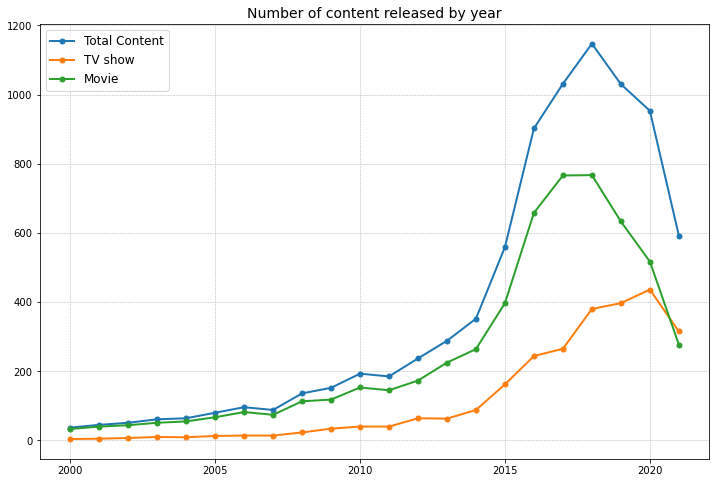

In [263]:
netflix_year_rl = netflix.groupby('release_year')['show_id'].count().reset_index()
netflix_year_rl = netflix_year_rl[netflix_year_rl['release_year'] >= 2000]
netflix_year_tv_rl = netflix_tv.groupby('release_year')['show_id'].count().reset_index()
netflix_year_tv_rl = netflix_year_tv_rl[netflix_year_tv_rl['release_year'] >= 2000]
netflix_year_movie_rl = netflix_movie.groupby('release_year')['show_id'].count().reset_index()
netflix_year_movie_rl = netflix_year_movie_rl[netflix_year_movie_rl['release_year'] >= 2000]

plt.figure(figsize=(12,8))
plt.plot(netflix_year_rl['release_year'], netflix_year_rl['show_id'], label = 'Total Content', linewidth = 2, marker = 'o', markersize = 5)
plt.plot(netflix_year_tv_rl['release_year'], netflix_year_tv_rl['show_id'], label = 'TV show', linewidth = 2, marker = 'o', markersize = 5)
plt.plot(netflix_year_movie_rl['release_year'], netflix_year_movie_rl['show_id'], label = 'Movie', linewidth = 2, marker = 'o', markersize = 5)
plt.grid(linestyle = '--', linewidth = 0.5)
plt.legend(fontsize = 12)
plt.title('Number of content released by year', fontsize = 14);

* Total number of movies and TV Show significantly increased from 2014 and peaked at 2018 and then dropped since.
* While number of movies released peaked at 2017 and dropped, number of TV Show released still constantly rose until it peaked in 2020

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


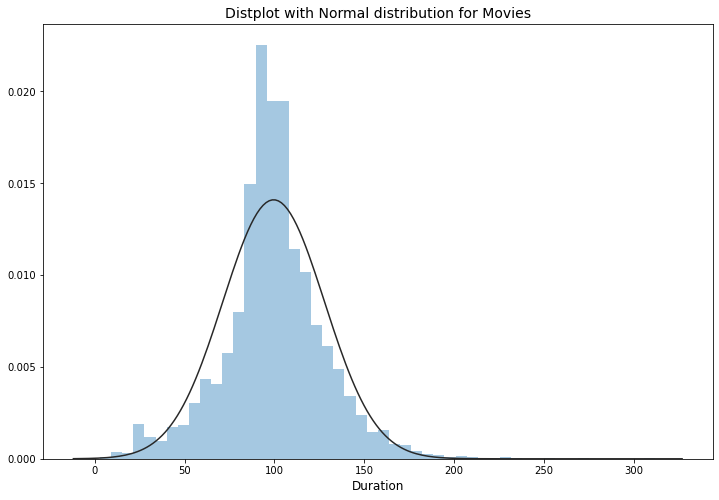

In [240]:
plt.figure(figsize = (12,8))
netflix_duration = netflix_movie['duration'].str.replace(' min', '')
sns.distplot(netflix_duration, fit=norm, kde=False)
plt.title('Distplot with Normal distribution for Movies', fontsize = 14)
plt.xlabel('Duration', fontsize = 12);

* Most of movie duration are from 80 to 120 minutes

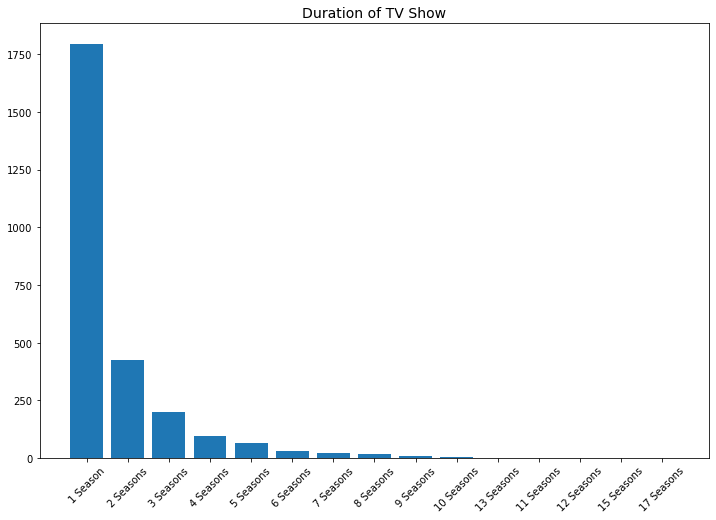

In [259]:
plt.figure(figsize = (12,8))
netflix_tv_duration = netflix_tv.groupby('duration')['show_id'].count().reset_index().sort_values('show_id', ascending = False)

plt.bar(netflix_tv_duration['duration'], netflix_tv_duration['show_id'])
plt.xticks(rotation = 45)
plt.title('Duration of TV Show', fontsize = 14);

* The number of TV Show with only 1 season is the highest which shows that most TV Show end after 1 season

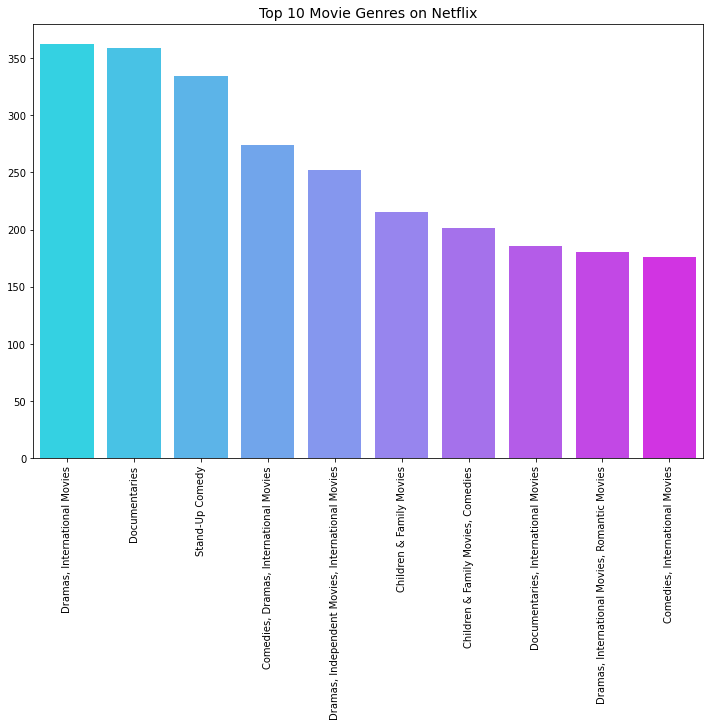

In [300]:
plt.figure(figsize = (12,8))
sns.barplot(x = netflix_movie['listed_in'].value_counts().head(10).index, 
             y = netflix_movie['listed_in'].value_counts().head(10).values, palette = 'cool')
plt.xticks(rotation = 90)
plt.title('Top 10 Movie Genres on Netflix', fontsize = 14);


* Drama, International Movies appear to be the most popular genre on Netflix, followed by Documentaries and Stand-up Comedy

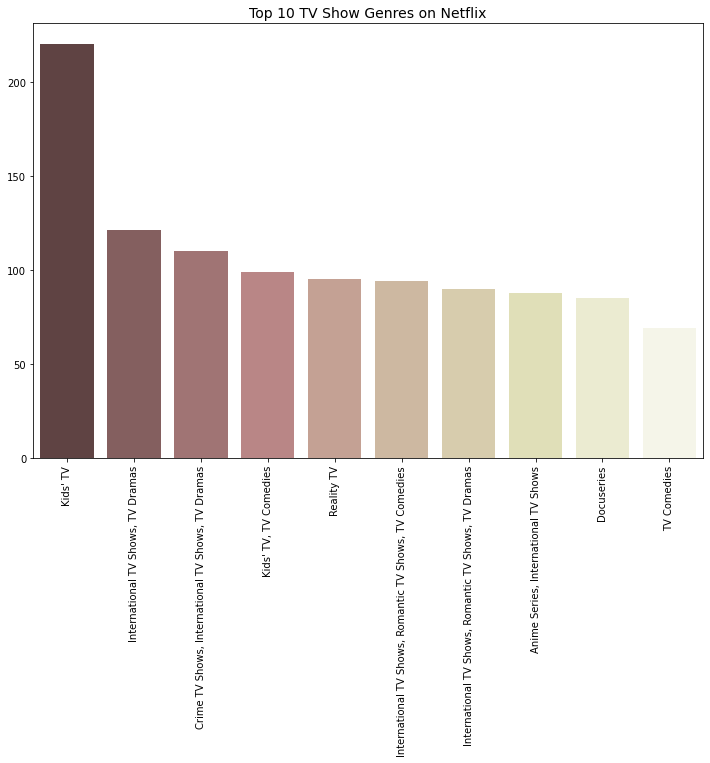

In [302]:
plt.figure(figsize = (12,8))
sns.barplot(x = netflix_tv['listed_in'].value_counts().head(10).index, 
            y = netflix_tv['listed_in'].value_counts().head(10).values, palette = 'pink')
plt.xticks(rotation = 90)
plt.title('Top 10 TV Show Genres on Netflix', fontsize = 14);

* For the TV Show category, the most popular genre is Kids'TV with the number of nearly double the followed genre